## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [4]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0712 01:49:17.188389   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 01:49:17.236392   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 01:49:17.246392   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 01:49:20.824521   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 01:49:20.838522   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 01:49:22.125542   856 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 01:49:22.188545   856 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.9182 - acc: 0.3068 - val_loss: 1.7625 - val_acc: 0.3700
Epoch 2/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.7151 - acc: 0.3853 - val_loss: 1.6609 - val_acc: 0.4086
Epoch 3/100
50000/50000 [==============================] - 9s 190us/step - loss: 1.6172 - acc: 0.4223 - val_loss: 1.6187 - val_acc: 0.4270
Epoch 4/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.5582 - acc: 0.4448 - val_loss: 1.5975 - val_acc: 0.4315
Epoch 5/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.5071 - acc: 0.4657 - val_loss: 1.5351 - val_acc: 0.4543
Epoch 6/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.4686 - acc: 0.4765 - val_loss: 1.4823 - val_acc: 0.4732
Epoch 7/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.4281 - acc: 0.4891 - val_loss: 1.

50000/50000 [==============================] - 13s 256us/step - loss: 0.5515 - acc: 0.8023 - val_loss: 2.0151 - val_acc: 0.5132
Epoch 59/100
50000/50000 [==============================] - 13s 253us/step - loss: 0.5370 - acc: 0.8088 - val_loss: 1.9648 - val_acc: 0.5163
Epoch 60/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.5126 - acc: 0.8166 - val_loss: 2.0883 - val_acc: 0.5142
Epoch 61/100
50000/50000 [==============================] - 14s 270us/step - loss: 0.5239 - acc: 0.8111 - val_loss: 2.0682 - val_acc: 0.5138
Epoch 62/100
50000/50000 [==============================] - 15s 304us/step - loss: 0.5015 - acc: 0.8214 - val_loss: 2.0917 - val_acc: 0.5163
Epoch 63/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.5025 - acc: 0.8192 - val_loss: 2.0965 - val_acc: 0.5148
Epoch 64/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.4880 - acc: 0.8253 - val_loss: 2.1736 - val_acc: 0.5081
Epoch 65/100
50000/50000 [

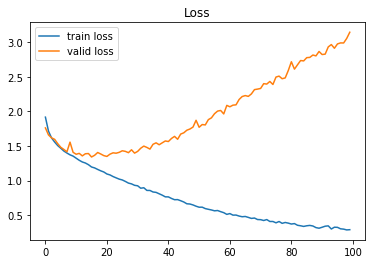

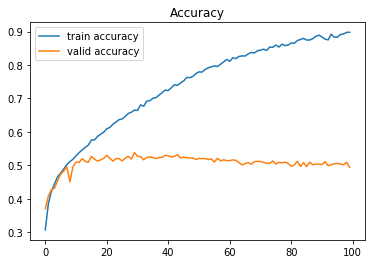

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()